<a href="https://colab.research.google.com/github/isakhammer/numerical-mathematics-project-2/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Main Concept**

Compare Integrators, and ODE-networks vs Hamilton Networks. 


**Generate Synthetic Input Data**


Synthetic data is "any production data applicable to a given situation that are not obtained by direct measurement"


In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""

def RK4(x0, t0, T, f, h):
  N = (T - t0)/h
  
  xi = x0
  ti = t0
  while ti < T:
    k1 = f(xi, ti)
    k2 = f(xi + h*k1*0.5, ti + h*0.5)
    k3 = f(xi + h*k2*0.5, ti + h*0.5)
    k4 = f(xi + h*k3, ti + h)
    xi += (h/6)*(k1 + k2*2 + k3*2 +k4) 
"""

In [60]:


"""
Symplectic Euler Method for 2 dim.

Notation:
d - dimensions of p,q
p - Generalized Coordinates
q - Conjugate momenta
V -  Potential energy function
T - Kinetic energy function

Input:
 p0: (d,1) numpy array of inital values
 q0: (d,1) numpy array of inital values
 t0: Inital time
 T:  Terminal time
 dV: Function dV(q)/dq
 dT: Function dT(p)/dp
Output:
  q: (d, N) numpy array of all values from t0,T
  p: (d, N) numpy array of all values from t0,T
  t: (1, N) numpy array for time

"""

def symplectic_euler_method(p0, q0, t0, T, h, dV, dT):
  
  N = int(T/h)
  p = np.zeros((p0.shape[0], N))
  q = np.zeros((q0.shape[0], N))
  t = np.zeros((1, N))

  p[0] = p0
  q[0] = q0
  t[0] = t0

  for i in range(N):
    q[:,i] = q[:,i-1] + h*dT(p[:,i-1])
    p[:,i] = p[:,i-1] - h*dT(q[:,i])
    t[:,i] = t[:,i-1] + h

  return p,q,t


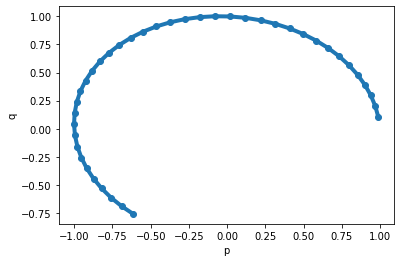

In [80]:
def H_pendumlum(p, q):
    return 0.5*p*2 - cos(q)
  
def dV_pendulum(q):
  return -np.cos(q)

def dT_pendulum(p):
  return p


def non_linear_pendulum():
  
  q0 = np.array([0])
  p0 = np.array([1])

  T = 4
  t0 = 0
  h = 0.1
  p, q, t = symplectic_euler_method(p0, q0, t0, T, h, dV_pendulum, dT_pendulum)

  plt.title("")
  plt.scatter(p,q)
  plt.plot(p[0], q[0],  linewidth=4) 
  plt.xlabel("p")
  plt.ylabel("q")
  plt.plot()

non_linear_pendulum()


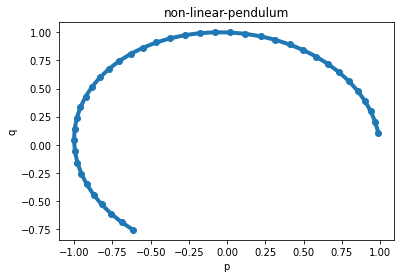

In [81]:

def dV_pendulum(q):
  return -np.cos(q)
  
def dT_pendulum(p):
  return p


def non_linear_pendulum():
  
  q0 = np.array([0])
  p0 = np.array([1])

  T = 4
  t0 = 0
  h = 0.1
  p, q, t = symplectic_euler_method(p0, q0, t0, T, h, dV_pendulum, dT_pendulum)

  plt.title("non-linear-pendulum")
  plt.scatter(p,q)
  plt.plot(p[0], q[0],  linewidth=4) 
  plt.xlabel("p")
  plt.ylabel("q")
  plt.plot()

non_linear_pendulum()


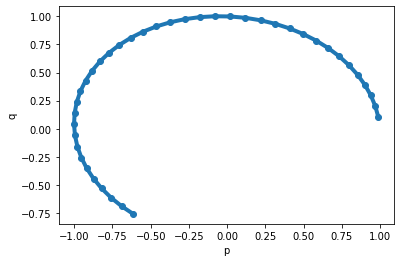

In [83]:
def dV_kepler(q):
  return -np.cos(q)
  
def dT_kepler(p):
  return p


def kepler_two_body():

  q0 = np.array([0])
  p0 = np.array([1])

  T = 4
  t0 = 0
  h = 0.1
  p, q, t = symplectic_euler_method(p0, q0, t0, T, h, dV_pendulum, dT_pendulum)

  plt.title("")
  plt.scatter(p,q)
  plt.plot(p[0], q[0],  linewidth=4) 
  plt.xlabel("p")
  plt.ylabel("q")
  plt.plot()

pendulum()

